In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Machine learning for data analysis\EDA Dataset\Doctor's Fee\train.csv")
data.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
data.drop(data.loc[data['Place'].isnull()].index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5936 non-null   object
 1   Experience          5936 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5936 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5936 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 371.0+ KB


# Data Preprocessing

In [5]:
#parsing experience string to a number
exp=list(data['Experience'])
out1=[]
for e in exp:
    e.strip()
    out1.append(int(e[:2]))
data['Experience']=np.array(out1)
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
#parsing places to city
places=list(data['Place'])
out2=[]
for p in places:
    p=str(p)
    if p=='NaN':
        out2.append('NaN')
        continue
    p.strip()
    p=p.split(',')
    out2.append(p[-1].strip())
data['Place']=np.array(out2)
data.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8,NaN,Chennai,Ayurveda,NaN,100
6,BHMS,42,NaN,Delhi,Homeopath,NaN,200
7,BDS,10,99%,Bangalore,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14,NaN,Hyderabad,General Medicine,NaN,100
9,"BSc, BDS",23,NaN,Ernakulam,Dentist,NaN,100


In [7]:
data.drop(columns='Miscellaneous_Info',inplace=True)
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100%,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,250
4,BAMS,20,100%,Chennai,Ayurveda,250


In [8]:
out3=[]
for r in list(data['Rating']):
    r=str(r)
    if r=='nan':
        out3.append(np.NaN)
        continue
    r.strip()
    out3.append(int(r[:-1]))
data['Rating']=np.array(out3)
    

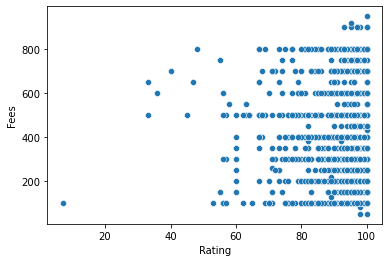

In [9]:
sns.scatterplot(x='Rating',y='Fees',data=data)


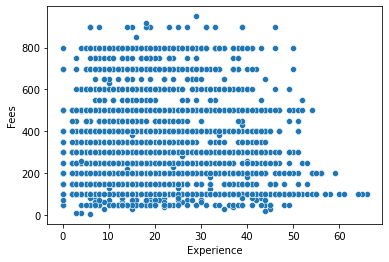

In [10]:
sns.scatterplot(x='Experience',y='Fees',data=data)

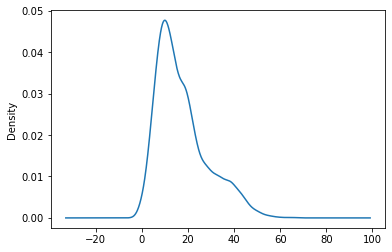

In [11]:
data['Experience'].plot.kde()

## Applying ordinal encoding to Qualification

In [12]:
data.Qualification.value_counts().head(60)

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                91
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

## Idea behind ordinal encodjng
1. More than or equal to 2 degrees is considered as a single class lets say X in ranking
2. Target encoding is performed to the rest of the classes like MBBS,BAMS,BHMS,BDS

In [13]:
labels=['BDS','MBBS','BHMS','BAMS']
temp=[]
for qual in list(data['Qualification']):
    if qual not in labels:
        temp.append('Multiple')
        continue
    temp.append(qual)
data['Qualification_ordinal']=np.array(temp)
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_ordinal
0,"BHMS, MD - Homeopathy",24,100.0,Ernakulam,Homeopath,100,Multiple
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Bangalore,Ayurveda,350,Multiple
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,300,Multiple
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,250,Multiple
4,BAMS,20,100.0,Chennai,Ayurveda,250,BAMS


In [14]:
data.groupby('Qualification_ordinal')['Fees'].sum().sort_values(ascending=False)

Qualification_ordinal
Multiple    1418215
BHMS         139849
BAMS          99619
BDS           97265
MBBS          78160
Name: Fees, dtype: int64

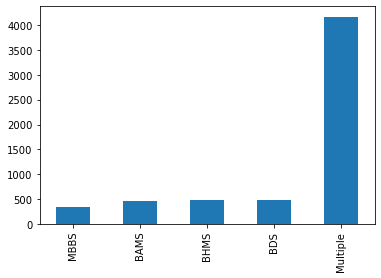

In [17]:
data.Qualification_ordinal.value_counts().sort_values().plot.bar()

In [18]:
#Target Encoding
Qual_map={'Multiple':4,'BHMS':3,'BAMS':2,'BDS':1,'MBBS':0}
data['Qualification_ordinal']=data['Qualification_ordinal'].map(Qual_map)
data.head(20)

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_ordinal
0,"BHMS, MD - Homeopathy",24,100.0,Ernakulam,Homeopath,100,4
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Bangalore,Ayurveda,350,4
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,300,4
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,250,4
4,BAMS,20,100.0,Chennai,Ayurveda,250,2
5,BAMS,8,NaN,Chennai,Ayurveda,100,2
6,BHMS,42,NaN,Delhi,Homeopath,200,3
7,BDS,10,99.0,Bangalore,Dentist,200,1
8,"MBBS, MD - General Medicine",14,NaN,Hyderabad,General Medicine,100,4
9,"BSc, BDS",23,NaN,Ernakulam,Dentist,100,4


In [19]:
data.drop(columns='Qualification',inplace=True)

## Applying Nominal encoding to places - Frequency Encoding, ALSO tried with one hot encoding

In [15]:
#Frequency encoding
place_map=data.Place.value_counts().to_dict()
place_map

{'Bangalore': 1258,
 'Mumbai': 1219,
 'Delhi': 1185,
 'Hyderabad': 951,
 'Chennai': 855,
 'Coimbatore': 228,
 'Ernakulam': 153,
 'Thiruvananthapuram': 86,
 'e': 1}

In [16]:
data['Place']=data['Place'].map(place_map)
data.head()

,Experience,Rating,Place,Profile,Fees,Qualification_ordinal
0,24,100.0,153,Homeopath,100,4
1,12,98.0,1258,Ayurveda,350,4
2,9,NaN,1258,ENT Specialist,300,4
3,12,NaN,1258,Ayurveda,250,4
4,20,100.0,855,Ayurveda,250,2


In [20]:
# trying with one hot encoding
for place in ['Bangalore','Mumbai','Delhi','Hyderabad','Chennai','Coimbatore','Ernakulam']:
    data[place]=np.where(data['Place']==place,1,0)
data.head()

,Experience,Rating,Place,Profile,Fees,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
0,24,100.0,Ernakulam,Homeopath,100,4,0,0,0,0,0,0,1
1,12,98.0,Bangalore,Ayurveda,350,4,1,0,0,0,0,0,0
2,9,NaN,Bangalore,ENT Specialist,300,4,1,0,0,0,0,0,0
3,12,NaN,Bangalore,Ayurveda,250,4,1,0,0,0,0,0,0
4,20,100.0,Chennai,Ayurveda,250,2,0,0,0,0,1,0,0


In [21]:
data.drop(columns='Place',inplace=True)
data.head()

,Experience,Rating,Profile,Fees,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
0,24,100.0,Homeopath,100,4,0,0,0,0,0,0,1
1,12,98.0,Ayurveda,350,4,1,0,0,0,0,0,0
2,9,NaN,ENT Specialist,300,4,1,0,0,0,0,0,0
3,12,NaN,Ayurveda,250,4,1,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,2,0,0,0,0,1,0,0


## One hot Encoding -Profile 

In [22]:
data.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [23]:
data1=pd.get_dummies(data['Profile'],drop_first=True)

In [24]:
data1.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [25]:
data=pd.concat([data1,data],axis=1)

In [26]:
data.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Experience,Rating,Profile,Fees,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
0,0,0,0,0,1,24,100.0,Homeopath,100,4,0,0,0,0,0,0,1
1,0,0,0,0,0,12,98.0,Ayurveda,350,4,1,0,0,0,0,0,0
2,0,0,1,0,0,9,NaN,ENT Specialist,300,4,1,0,0,0,0,0,0
3,0,0,0,0,0,12,NaN,Ayurveda,250,4,1,0,0,0,0,0,0
4,0,0,0,0,0,20,100.0,Ayurveda,250,2,0,0,0,0,1,0,0


In [27]:
data.drop(columns='Profile',inplace=True)
data.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Experience,Rating,Fees,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
0,0,0,0,0,1,24,100.0,100,4,0,0,0,0,0,0,1
1,0,0,0,0,0,12,98.0,350,4,1,0,0,0,0,0,0
2,0,0,1,0,0,9,NaN,300,4,1,0,0,0,0,0,0
3,0,0,0,0,0,12,NaN,250,4,1,0,0,0,0,0,0
4,0,0,0,0,0,20,100.0,250,2,0,0,0,0,1,0,0


In [28]:
data.corr()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Experience,Rating,Fees,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
Dentist,1.000000,-0.251057,-0.207419,-0.275313,-0.225707,-0.206173,0.274575,-0.205277,-0.151108,-0.057393,-0.066734,-0.055519,-0.000879,0.033682,0.186678,0.097718
Dermatologists,-0.251057,1.000000,-0.169194,-0.224576,-0.184112,-0.083701,-0.081381,0.217061,0.247843,0.005669,0.004213,0.027573,0.028550,-0.015753,-0.057772,-0.014171
ENT Specialist,-0.207419,-0.169194,1.000000,-0.185541,-0.152110,0.080537,-0.243801,0.153813,0.204685,0.028548,-0.054031,0.030411,0.000515,0.042623,-0.048000,-0.015440
General Medicine,-0.275313,-0.224576,-0.185541,1.000000,-0.201900,0.334603,-0.161116,0.013254,-0.152509,-0.026492,-0.018730,-0.020285,0.016234,0.059094,0.024095,-0.032663
Homeopath,-0.225707,-0.184112,-0.152110,-0.201900,1.000000,-0.072912,0.084457,-0.004930,0.047231,0.006312,0.056012,0.063644,-0.029020,-0.055560,-0.071267,-0.029628
Experience,-0.206173,-0.083701,0.080537,0.334603,-0.072912,1.000000,-0.313592,-0.004699,-0.053933,-0.061567,0.051014,0.056968,-0.057742,0.023662,-0.010578,-0.009673
Rating,0.274575,-0.081381,-0.243801,-0.161116,0.084457,-0.313592,1.000000,-0.133572,-0.101173,-0.059025,0.052370,-0.032428,-0.035044,0.057232,0.041088,0.035556
Fees,-0.205277,0.217061,0.153813,0.013254,-0.004930,-0.004699,-0.133572,1.000000,0.256234,0.054431,-0.001383,0.141579,-0.002985,-0.054190,-0.161820,-0.102605
Qualification_ordinal,-0.151108,0.247843,0.204685,-0.152509,0.047231,-0.053933,-0.101173,0.256234,1.000000,0.025012,-0.062855,0.049101,0.044859,0.032045,-0.094841,-0.039720
Bangalore,-0.057393,0.005669,0.028548,-0.026492,0.006312,-0.061567,-0.059025,0.054431,0.025012,1.000000,-0.263620,-0.258986,-0.226500,-0.212725,-0.103642,-0.084349


In [29]:
data.drop(columns='Rating',inplace=True)
data.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Experience,Fees,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
0,0,0,0,0,1,24,100,4,0,0,0,0,0,0,1
1,0,0,0,0,0,12,350,4,1,0,0,0,0,0,0
2,0,0,1,0,0,9,300,4,1,0,0,0,0,0,0
3,0,0,0,0,0,12,250,4,1,0,0,0,0,0,0
4,0,0,0,0,0,20,250,2,0,0,0,0,1,0,0


In [30]:
Y=data['Fees']
data.drop(columns='Fees',inplace=True)


In [31]:
X=data
X.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Experience,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
0,0,0,0,0,1,24,4,0,0,0,0,0,0,1
1,0,0,0,0,0,12,4,1,0,0,0,0,0,0
2,0,0,1,0,0,9,4,1,0,0,0,0,0,0
3,0,0,0,0,0,12,4,1,0,0,0,0,0,0
4,0,0,0,0,0,20,2,0,0,0,0,1,0,0


### Iteration on different models
1. Regression tree 
2. Linear Regressor
3. Xgboost tree (Boosting)
4. Random forest regressor (Bagging)

## 1. Regression tree

In [32]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y=train_test_split(X,Y)
regression_model=DecisionTreeRegressor(random_state=0)
regression_model.fit(train_X,train_Y)

DecisionTreeRegressor(random_state=0)

In [33]:
from sklearn.metrics import accuracy_score,max_error,mean_absolute_error,r2_score,mean_squared_error

y_pred=regression_model.predict(test_X)
mae=mean_absolute_error(test_Y,y_pred)
me=max_error(test_Y,y_pred)
r2=r2_score(test_Y,y_pred)
mse=mean_squared_error(test_Y,y_pred)
print('Mean absolute error in regression Tree: '+ str(mae))
print('Max error in regression Tree: '+ str(me))
print('Coeff. of determination in regression Tree: '+ str(r2))
print('Mean Squared error in regression Tree: '+ str(mse))

Mean absolute error in regression Tree: 150.72319183137915
Max error in regression Tree: 800.0
Coeff. of determination in regression Tree: -0.13449973341053
Mean Squared error in regression Tree: 41078.071761629515


## 2. Linear regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler

linear_train_X,linear_test_X=train_X,test_X

scaler=MinMaxScaler()
linear_train_X=scaler.fit_transform(linear_train_X)


lin_model=LinearRegression()
lin_model.fit(linear_train_X,train_Y)





LinearRegression()

In [35]:
linear_test_X=scaler.transform(linear_test_X)
y_predl=lin_model.predict(linear_test_X)

mae=mean_absolute_error(test_Y,y_predl)
me=max_error(test_Y,y_predl)
r2=r2_score(test_Y,y_predl)
mse=mean_squared_error(test_Y,y_predl)
print('Mean absolute error in LinearRegression: '+ str(mae))
print('Max error in LinearRegression: '+ str(me))
print('Coeff. of determination in LinearRegression: '+ str(r2))
print('Mean Squared error in LinearRegression: '+ str(mse))

Mean absolute error in LinearRegression: 135.17111663931286
Max error in LinearRegression: 609.1371237691183
Coeff. of determination in LinearRegression: 0.19310835379124713
Mean Squared error in regression Tree: 29216.00769987001


In [36]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y)
train_X.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Experience,Qualification_ordinal,Bangalore,Mumbai,Delhi,Hyderabad,Chennai,Coimbatore,Ernakulam
436,0,0,0,0,0,7,4,0,0,0,0,1,0,0
4512,0,0,1,0,0,19,4,0,0,0,1,0,0,0
2560,0,0,0,1,0,48,0,0,1,0,0,0,0,0
2773,1,0,0,0,0,0,4,0,1,0,0,0,0,0
791,0,0,0,0,1,12,3,0,0,0,0,1,0,0


## 3. Xgboost tree

In [37]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid={"learning_rate": [ 0.10, 0.20, 0.30 ] ,"max_depth": [ 6, 8, 10, 12],"min_child_weight" : [ 1, 3, 5 ],"gamma": [ 0.0, 0.1, 0.2 , 0.3],'colsample_bytree': [0.5, 0.7]}
xgb_model=XGBRegressor()

gsearch=GridSearchCV(xgb_model,param_grid=param_grid,cv=5)
gsearch.fit(train_X,train_Y)

print(gsearch.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5}


In [38]:
xgb_model=XGBRegressor(colsample_bytree= 0.5, gamma= 0.0, learning_rate= 0.1, max_depth=6, min_child_weight= 5)
xgb_model.fit(train_X,train_Y)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred=xgb_model.predict(test_X)

mae=mean_absolute_error(test_Y,y_pred)
me=max_error(test_Y,y_pred)
r2=r2_score(test_Y,y_pred)
mse=mean_squared_error(test_Y,y_pred)
print('Mean absolute error in XGB: '+ str(mae))
print('Max error in XGB: '+ str(me))
print('Coeff. of determination in XGB: '+ str(r2))
print('Mean Squared error in XGB: '+ str(mse))

Mean absolute error in XGB: 133.23691245487757
Max error in XGB: 631.8022155761719
Coeff. of determination in XGB: 0.16818427304430839
Mean Squared error in XGB: 29190.4739536441


## 4. Random forest regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

rfr_model=RandomForestRegressor()

random_grid={'max_depth':[80,90,100],'min_samples_leaf':[5,7],'min_samples_split':[9,10],'n_estimators':[100,200]}

grid=GridSearchCV(rfr_model,param_grid=random_grid,cv=3)
grid.fit(train_X,train_Y)

print(grid.best_params_)

{'max_depth': 80, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 200}


In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor(max_depth=80,min_samples_leaf= 7,min_samples_split=9, n_estimators=200)
rfr_model.fit(train_X,train_Y)

RandomForestRegressor(max_depth=80, min_samples_leaf=7, min_samples_split=9,
                      n_estimators=200)

In [42]:
y_pred=rfr_model.predict(test_X)

mae=mean_absolute_error(test_Y,y_pred)
me=max_error(test_Y,y_pred)
r2=r2_score(test_Y,y_pred)
mse=mean_squared_error(test_Y,y_pred)
print('Mean absolute error in Random forest regression: '+ str(mae))
print('Max error in Random Forest regression: '+ str(me))
print('Coeff. of determination in Random Forest regression: '+ str(r2))
print('Mean Squared error in RandomForest Regression: '+ str(mse))

Mean absolute error in Random forest regression: 134.8136387511312
Max error in Random Forest regression: 621.222302911331
Coeff. of determination in Random Forest regression: 0.138918786370001
Mean Squared error in RandomForest Regression: 30217.47236065137
